### Data Import

In [39]:
import pandas as pd

# ETF
etf = pd.read_csv('./etf_month_JY.csv')

# Risk Free
rf = pd.read_csv('./rf_JY.csv')

# Risk Premium
credit01 = pd.read_csv('./credit01_JY.csv')
credit02 = pd.read_csv('./credit02_JY.csv')
credit03 = pd.read_csv('./credit03_JY.csv')

term01 = pd.read_csv('./term01_JY.csv')
term02 = pd.read_csv('./term02_JY.csv')
term03 = pd.read_csv('./term03_JY.csv')

equity01 = pd.read_csv('./equity01_JY.csv')
equity02 = pd.read_csv('./equity02_JY.csv')

In [40]:
# Regime : List
from datetime import datetime
import pandas as pd

def create_date_range_list(date_ranges):
    """Create a list of all dates within the given date ranges."""
    date_list = []
    for date_range in date_ranges:
        start, end = date_range.split(' ~ ')
        date_list.extend(pd.date_range(start=start, end=end, freq='M'))
    return date_list

# Date ranges for each category
above_average = ['1992-10-31 ~ 1993-04-30', '1993-10-31 ~ 1995-02-28', '1996-11-30 ~ 1998-08-31', 
                 '1998-11-30 ~ 2000-10-31', '2003-10-31 ~ 2008-06-30', '2010-11-30 ~ 2011-05-31', 
                 '2012-02-29 ~ 2012-05-31', '2012-12-31 ~ 2015-08-31', '2017-02-28 ~ 2018-12-31', 
                 '2020-12-31 ~ 2021-10-31']
below_average = ['1990-04-30 ~ 1992-09-30', '1993-05-31 ~ 1993-09-30', '1995-03-31 ~ 1996-10-31', 
                 '1998-09-30 ~ 1998-10-31', '2000-11-30 ~ 2003-09-30', '2008-07-31 ~ 2010-10-31', 
                 '2011-06-30 ~ 2012-01-31', '2012-06-30 ~ 2012-11-30', '2015-09-30 ~ 2017-01-31', 
                 '2019-01-31 ~ 2020-11-30']
rising = ['1991-11-30 ~ 1992-09-30', '1992-11-30 ~ 1993-10-31', '1993-12-31 ~ 1994-01-31', 
          '1994-07-31 ~ 1994-08-31', '1995-01-31 ~ 1995-09-30', '1995-11-30 ~ 1995-12-31', 
          '1998-02-28 ~ 1998-03-31', '1998-05-31 ~ 1998-05-31', '1998-07-31 ~ 1998-07-31', 
          '1999-03-31 ~ 1999-04-30', '1999-06-30 ~ 2000-03-31', '2000-06-30 ~ 2000-09-30', 
          '2001-05-31 ~ 2001-08-31', '2001-12-31 ~ 2002-05-31', '2003-04-30 ~ 2005-09-30', 
          '2005-11-30 ~ 2006-04-30', '2006-09-30 ~ 2007-02-28', '2009-05-31 ~ 2011-07-31', 
          '2012-01-31 ~ 2014-01-31', '2014-04-30 ~ 2014-09-30', '2014-11-30 ~ 2014-11-30', 
          '2015-04-30 ~ 2015-07-31', '2016-03-31 ~ 2016-05-31', '2016-07-31 ~ 2018-01-31', 
          '2018-08-31 ~ 2018-09-30', '2019-03-31 ~ 2019-04-30', '2019-07-31 ~ 2019-07-31', 
          '2019-09-30 ~ 2020-01-31', '2020-12-31 ~ 2020-12-31', '2021-02-28 ~ 2021-10-31']
declining = ['1990-04-30 ~ 1991-10-31', '1992-10-31 ~ 1992-10-31', '1993-11-30 ~ 1993-11-30', 
             '1994-02-28 ~ 1994-06-30', '1994-09-30 ~ 1994-12-31', '1995-10-31 ~ 1995-10-31', 
             '1996-01-31 ~ 1998-01-31', '1998-04-30 ~ 1998-04-30', '1998-06-30 ~ 1998-06-30', 
             '1998-08-31 ~ 1999-02-28', '1999-05-31 ~ 1999-05-31', '2000-04-30 ~ 2000-05-31', 
             '2000-10-31 ~ 2001-04-30', '2001-09-30 ~ 2001-11-30', '2002-06-30 ~ 2003-03-31', 
             '2005-10-31 ~ 2005-10-31', '2006-05-31 ~ 2006-08-31', '2007-03-31 ~ 2009-04-30', 
             '2011-08-31 ~ 2011-12-31', '2014-02-28 ~ 2014-03-31', '2014-10-31 ~ 2014-10-31', 
             '2014-12-31 ~ 2015-03-31', '2015-08-31 ~ 2016-02-29', '2016-06-30 ~ 2016-06-30', 
             '2018-02-28 ~ 2018-07-31', '2018-10-31 ~ 2019-02-28', '2019-05-31 ~ 2019-06-30', 
             '2019-08-31 ~ 2019-08-31', '2020-02-29 ~ 2020-11-30', '2021-01-31 ~ 2021-01-31']

# Converting date ranges to lists of dates
above_average_dates = create_date_range_list(above_average)
below_average_dates = create_date_range_list(below_average)
rising_dates = create_date_range_list(rising)
declining_dates = create_date_range_list(declining)

# Identifying the phases
recovery = set(below_average_dates).intersection(set(rising_dates))
expansion = set(above_average_dates).intersection(set(rising_dates))
slowdown = set(above_average_dates).intersection(set(declining_dates))
contraction = set(below_average_dates).intersection(set(declining_dates))

# Converting sets back to sorted lists
recovery = sorted(list(recovery))
expansion = sorted(list(expansion))
slowdown = sorted(list(slowdown))
contraction = sorted(list(contraction))

# Convert datetime objects to string format for better readability
recovery = [date.strftime('%Y-%m') for date in recovery]
expansion = [date.strftime('%Y-%m') for date in expansion]
slowdown = [date.strftime('%Y-%m') for date in slowdown]
contraction = [date.strftime('%Y-%m') for date in contraction]

In [41]:
# Buy and Hold : List
from datetime import datetime
import pandas as pd

start_date = '1990-04-30'
end_date = '2021-10-31'

bh = pd.date_range(start=start_date, end=end_date, freq='M').strftime('%Y-%m-%d').tolist()

### Recovery - SPY

In [42]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data01 = etf_month_spy.merge(rf, on='DATE', how='inner')
data01 = data01.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data01 = data01.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data01 = data01.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data01 = data01.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data01 = data01.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data01 = data01.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data01 = data01.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data01 = data01.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data01.columns = ['DATE', 'SPY', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data01['DATE'] = pd.to_datetime(data01['DATE'])
data01.set_index('DATE', inplace=True)

# Assuming recovery_dates is a list of datetime objects representing the recovery dates
recovery_dates = [pd.to_datetime(date) for date in recovery]  # Convert your recovery dates to datetime objects if they are not already

# Adding the 'recovery' column
data01['recovery'] = data01.index.map(lambda x: 1 if x in recovery_dates else 0)

# Selecting relevant columns for the regression
X = data01[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data01['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model01 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.937e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          6.29e-233
Time:                        02:44:52   Log-Likelihood:                 97.088
No. Observations:                 166   AIC:                            -174.2
Df Residuals:                     156   BIC:                            -143.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.059      0.324      0.746      -0.097       0.135
rf            -0.0324      0.007     -4.642      0.000      -0.046      -0.019
credit01      -0.0032      0.002     -1.314      0.191      -0.008       0.002
credit02      -1.3728      0.424     -3.234      0.001      -2.211      -0.534
credit03      -0.0944      0.427     -0.221      0.825      -0.938       0.749
term01        -0.5013      0.341     -1.471      0.143      -1.175       0.172
term02         0.2149      0.564      0.381      0.704      -0.899       1.329
term03        98.8705      0.528    187.255      0.000      97.828      99.913
equity01      99.1610      0.283    350.692      0.000      98.602      99.720
equity02      -0.0872      0.034     -2.591      0.010      -0.154      -0.021
==============================================================================
Omnibus:                        7.796   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               14.405
Skew:                          -0.066   Prob(JB):                     0.000745
Kurtosis:                       4.437   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recovery - LQD

In [43]:
# 데이터 병합

etf_month_LQD = etf[['DATE', 'LQD']]
data02 = etf_month_LQD.merge(rf, on='DATE', how='inner')
data02 = data02.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data02 = data02.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data02 = data02.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data02 = data02.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data02 = data02.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data02 = data02.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data02 = data02.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data02 = data02.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data02.columns = ['DATE', 'LQD', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data02['DATE'] = pd.to_datetime(data02['DATE'])
data02.set_index('DATE', inplace=True)

# Assuming recovery_dates is a list of datetime objects representing the recovery dates
recovery_dates = [pd.to_datetime(date) for date in recovery]  # Convert your recovery dates to datetime objects if they are not already

# recovery 컬럼 추가
data02['recovery'] = data02.index.map(lambda x: 1 if x in recovery_dates else 0)

# Selecting relevant columns for the regression
X = data02[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data02['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model02 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     10.41
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.63e-12
Time:                        02:44:52   Log-Likelihood:                -328.58
No. Observations:                 166   AIC:                             677.2
Df Residuals:                     156   BIC:                             708.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4419      0.763      1.890      0.061      -0.065       2.949
rf            -0.2218      0.091     -2.449      0.015      -0.401      -0.043
credit01       0.1707      0.031      5.472      0.000       0.109       0.232
credit02     -22.7223      5.514     -4.121      0.000     -33.615     -11.830
credit03       9.2922      5.550      1.674      0.096      -1.671      20.255
term01       -10.4029      4.428     -2.349      0.020     -19.150      -1.656
term02         9.3101      7.328      1.271      0.206      -5.164      23.784
term03         7.0690      6.859      1.031      0.304      -6.480      20.618
equity01       9.2730      3.673      2.524      0.013       2.017      16.529
equity02       1.2432      0.437      2.844      0.005       0.380       2.107
==============================================================================
Omnibus:                        6.133   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                7.114
Skew:                          -0.267   Prob(JB):                       0.0285
Kurtosis:                       3.862   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recovery - TLT

In [44]:
# 데이터 병합
etf_month_TLT = etf[['DATE', 'TLT']]
data03 = etf_month_TLT.merge(rf, on='DATE', how='inner')
data03 = data03.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data03 = data03.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data03 = data03.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data03 = data03.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data03 = data03.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data03 = data03.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data03 = data03.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data03 = data03.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data03.columns = ['DATE', 'TLT', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data03['DATE'] = pd.to_datetime(data03['DATE'])
data03.set_index('DATE', inplace=True)

# Assuming recovery_dates is a list of datetime objects representing the recovery dates
recovery_dates = [pd.to_datetime(date) for date in recovery]  # Convert your recovery dates to datetime objects if they are not already

# recovery 컬럼 추가
data03['recovery'] = data03.index.map(lambda x: 1 if x in recovery_dates else 0)

# Selecting relevant columns for the regression
X = data03[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data03['TLT']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model03 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.795
Date:                Mon, 20 Nov 2023   Prob (F-statistic):            0.00457
Time:                        02:44:52   Log-Likelihood:                -454.19
No. Observations:                 166   AIC:                             928.4
Df Residuals:                     156   BIC:                             959.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9633      1.626      1.823      0.070      -0.248       6.175
rf             0.1759      0.193      0.911      0.364      -0.205       0.557
credit01       0.1649      0.066      2.479      0.014       0.034       0.296
credit02      -8.2920     11.752     -0.706      0.482     -31.506      14.922
credit03       5.7811     11.828      0.489      0.626     -17.582      29.144
term01       -14.9012      9.437     -1.579      0.116     -33.543       3.740
term02        16.6297     15.616      1.065      0.289     -14.217      47.476
term03       -36.0578     14.618     -2.467      0.015     -64.933      -7.183
equity01     -30.2199      7.828     -3.860      0.000     -45.683     -14.757
equity02       1.4676      0.932      1.575      0.117      -0.373       3.308
==============================================================================
Omnibus:                       13.212   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.578
Skew:                          -0.249   Prob(JB):                     2.29e-07
Kurtosis:                       5.043   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recovery - HYG

In [45]:
# 데이터 병합
etf_month_HYG = etf[['DATE', 'HYG']]
data04 = etf_month_HYG.merge(rf, on='DATE', how='inner')
data04 = data04.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data04 = data04.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data04 = data04.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data04 = data04.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data04 = data04.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data04 = data04.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data04 = data04.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data04 = data04.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data04.columns = ['DATE', 'HYG', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data04['DATE'] = pd.to_datetime(data04['DATE'])
data04.set_index('DATE', inplace=True)

# Assuming recovery_dates is a list of datetime objects representing the recovery dates
recovery_dates = [pd.to_datetime(date) for date in recovery]  # Convert your recovery dates to datetime objects if they are not already

# recovery 컬럼 추가
data04['recovery'] = data04.index.map(lambda x: 1 if x in recovery_dates else 0)

# Selecting relevant columns for the regression
X = data04[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data04['HYG']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model04 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HYG   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     28.37
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.11e-28
Time:                        02:44:52   Log-Likelihood:                -345.36
No. Observations:                 166   AIC:                             710.7
Df Residuals:                     156   BIC:                             741.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1367      0.844      1.347      0.180      -0.530       2.804
rf            -0.1845      0.100     -1.841      0.067      -0.382       0.013
credit01       0.1737      0.035      5.032      0.000       0.105       0.242
credit02     -18.1037      6.101     -2.967      0.003     -30.155      -6.053
credit03       8.6696      6.140      1.412      0.160      -3.459      20.798
term01        -5.1276      4.899     -1.047      0.297     -14.805       4.550
term02         1.9702      8.107      0.243      0.808     -14.043      17.984
term03        47.3735      7.589      6.243      0.000      32.383      62.364
equity01      43.9530      4.064     10.815      0.000      35.925      51.981
equity02       1.4257      0.484      2.948      0.004       0.470       2.381
==============================================================================
Omnibus:                       30.721   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.161
Skew:                           0.516   Prob(JB):                     2.22e-31
Kurtosis:                       7.398   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recovery - EMB

In [46]:
# 데이터 병합
etf_month_EMB = etf[['DATE', 'EMB']]
data05 = etf_month_EMB.merge(rf, on='DATE', how='inner')
data05 = data05.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data05 = data05.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data05 = data05.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data05 = data05.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data05 = data05.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data05 = data05.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data05 = data05.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data05 = data05.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data05.columns = ['DATE', 'EMB', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data05['DATE'] = pd.to_datetime(data05['DATE'])
data05.set_index('DATE', inplace=True)

# Assuming recovery_dates is a list of datetime objects representing the recovery dates
recovery_dates = [pd.to_datetime(date) for date in recovery]  # Convert your recovery dates to datetime objects if they are not already

# recovery 컬럼 추가
data05['recovery'] = data05.index.map(lambda x: 1 if x in recovery_dates else 0)

# Selecting relevant columns for the regression
X = data05[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data05['EMB']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model05 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EMB   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     14.50
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.88e-17
Time:                        02:44:52   Log-Likelihood:                -387.36
No. Observations:                 166   AIC:                             794.7
Df Residuals:                     156   BIC:                             825.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6706      1.087      0.617      0.538      -1.477       2.818
rf            -0.4150      0.129     -3.216      0.002      -0.670      -0.160
credit01       0.1647      0.044      3.705      0.000       0.077       0.253
credit02     -23.3968      7.858     -2.978      0.003     -38.918      -7.876
credit03       4.1120      7.908      0.520      0.604     -11.509      19.733
term01        -8.9083      6.310     -1.412      0.160     -21.372       3.556
term02         7.0397     10.441      0.674      0.501     -13.585      27.664
term03        32.0292      9.774      3.277      0.001      12.723      51.336
equity01      33.8399      5.234      6.465      0.000      23.501      44.179
equity02       0.7100      0.623      1.140      0.256      -0.521       1.941
==============================================================================
Omnibus:                       58.616   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.877
Skew:                          -1.001   Prob(JB):                    5.13e-106
Kurtosis:                      11.130   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Expansion - SPY

In [47]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data06 = etf_month_spy.merge(rf, on='DATE', how='inner')
data06 = data06.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data06 = data06.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data06 = data06.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data06 = data06.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data06 = data06.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data06 = data06.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data06 = data06.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data06 = data06.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data06.columns = ['DATE', 'SPY', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data06['DATE'] = pd.to_datetime(data06['DATE'])
data06.set_index('DATE', inplace=True)

# Assuming expansion_dates is a list of datetime objects representing the expansion dates
expansion_dates = [pd.to_datetime(date) for date in expansion]  # Convert your expansion dates to datetime objects if they are not already

# Adding the 'expansion' column
data06['expansion'] = data06.index.map(lambda x: 1 if x in expansion_dates else 0)

# Selecting relevant columns for the regression
X = data06[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data06['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model06 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model06.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.937e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          6.29e-233
Time:                        02:44:52   Log-Likelihood:                 97.088
No. Observations:                 166   AIC:                            -174.2
Df Residuals:                     156   BIC:                            -143.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.059      0.324      0.746      -0.097       0.135
rf            -0.0324      0.007     -4.642      0.000      -0.046      -0.019
credit01      -0.0032      0.002     -1.314      0.191      -0.008       0.002
credit02      -1.3728      0.424     -3.234      0.001      -2.211      -0.534
credit03      -0.0944      0.427     -0.221      0.825      -0.938       0.749
term01        -0.5013      0.341     -1.471      0.143      -1.175       0.172
term02         0.2149      0.564      0.381      0.704      -0.899       1.329
term03        98.8705      0.528    187.255      0.000      97.828      99.913
equity01      99.1610      0.283    350.692      0.000      98.602      99.720
equity02      -0.0872      0.034     -2.591      0.010      -0.154      -0.021
==============================================================================
Omnibus:                        7.796   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               14.405
Skew:                          -0.066   Prob(JB):                     0.000745
Kurtosis:                       4.437   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Expansion - LQD

In [48]:
# 데이터 병합
etf_month_LQD = etf[['DATE', 'LQD']]
data07 = etf_month_LQD.merge(rf, on='DATE', how='inner')
data07 = data07.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data07 = data07.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data07 = data07.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data07 = data07.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data07 = data07.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data07 = data07.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data07 = data07.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data07 = data07.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data07.columns = ['DATE', 'LQD', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data07['DATE'] = pd.to_datetime(data07['DATE'])
data07.set_index('DATE', inplace=True)

# Assuming expansion_dates is a list of datetime objects representing the expansion dates
expansion_dates = [pd.to_datetime(date) for date in expansion]  # Convert your expansion dates to datetime objects if they are not already

# Adding the 'expansion' column
data07['expansion'] = data07.index.map(lambda x: 1 if x in expansion_dates else 0)

# Selecting relevant columns for the regression
X = data07[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data07['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model07 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model07.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     10.41
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.63e-12
Time:                        02:44:52   Log-Likelihood:                -328.58
No. Observations:                 166   AIC:                             677.2
Df Residuals:                     156   BIC:                             708.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4419      0.763      1.890      0.061      -0.065       2.949
rf            -0.2218      0.091     -2.449      0.015      -0.401      -0.043
credit01       0.1707      0.031      5.472      0.000       0.109       0.232
credit02     -22.7223      5.514     -4.121      0.000     -33.615     -11.830
credit03       9.2922      5.550      1.674      0.096      -1.671      20.255
term01       -10.4029      4.428     -2.349      0.020     -19.150      -1.656
term02         9.3101      7.328      1.271      0.206      -5.164      23.784
term03         7.0690      6.859      1.031      0.304      -6.480      20.618
equity01       9.2730      3.673      2.524      0.013       2.017      16.529
equity02       1.2432      0.437      2.844      0.005       0.380       2.107
==============================================================================
Omnibus:                        6.133   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                7.114
Skew:                          -0.267   Prob(JB):                       0.0285
Kurtosis:                       3.862   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Expansion - TLT

In [49]:
# 데이터 병합
etf_month_TLT = etf[['DATE', 'TLT']]
data08 = etf_month_TLT.merge(rf, on='DATE', how='inner')
data08 = data08.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data08 = data08.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data08 = data08.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data08 = data08.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data08 = data08.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data08 = data08.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data08 = data08.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data08 = data08.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data08.columns = ['DATE', 'TLT', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data08['DATE'] = pd.to_datetime(data08['DATE'])
data08.set_index('DATE', inplace=True)

# Assuming expansion_dates is a list of datetime objects representing the expansion dates
expansion_dates = [pd.to_datetime(date) for date in expansion]  # Convert your expansion dates to datetime objects if they are not already

# Adding the 'expansion' column
data08['expansion'] = data08.index.map(lambda x: 1 if x in expansion_dates else 0)

# Selecting relevant columns for the regression
X = data08[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data08['TLT']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model08 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model08.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.795
Date:                Mon, 20 Nov 2023   Prob (F-statistic):            0.00457
Time:                        02:44:52   Log-Likelihood:                -454.19
No. Observations:                 166   AIC:                             928.4
Df Residuals:                     156   BIC:                             959.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9633      1.626      1.823      0.070      -0.248       6.175
rf             0.1759      0.193      0.911      0.364      -0.205       0.557
credit01       0.1649      0.066      2.479      0.014       0.034       0.296
credit02      -8.2920     11.752     -0.706      0.482     -31.506      14.922
credit03       5.7811     11.828      0.489      0.626     -17.582      29.144
term01       -14.9012      9.437     -1.579      0.116     -33.543       3.740
term02        16.6297     15.616      1.065      0.289     -14.217      47.476
term03       -36.0578     14.618     -2.467      0.015     -64.933      -7.183
equity01     -30.2199      7.828     -3.860      0.000     -45.683     -14.757
equity02       1.4676      0.932      1.575      0.117      -0.373       3.308
==============================================================================
Omnibus:                       13.212   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.578
Skew:                          -0.249   Prob(JB):                     2.29e-07
Kurtosis:                       5.043   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Expansion - HYG

In [50]:
# 데이터 병합
etf_month_HYG = etf[['DATE', 'HYG']]
data09 = etf_month_HYG.merge(rf, on='DATE', how='inner')
data09 = data09.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data09 = data09.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data09 = data09.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data09 = data09.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data09 = data09.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data09 = data09.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data09 = data09.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data09 = data09.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data09.columns = ['DATE', 'HYG', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data09['DATE'] = pd.to_datetime(data09['DATE'])
data09.set_index('DATE', inplace=True)

# Assuming expansion_dates is a list of datetime objects representing the expansion dates
expansion_dates = [pd.to_datetime(date) for date in expansion]  # Convert your expansion dates to datetime objects if they are not already

# Adding the 'expansion' column
data09['expansion'] = data09.index.map(lambda x: 1 if x in expansion_dates else 0)

# Selecting relevant columns for the regression
X = data09[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data09['HYG']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model09 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model09.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HYG   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     28.37
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.11e-28
Time:                        02:44:52   Log-Likelihood:                -345.36
No. Observations:                 166   AIC:                             710.7
Df Residuals:                     156   BIC:                             741.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1367      0.844      1.347      0.180      -0.530       2.804
rf            -0.1845      0.100     -1.841      0.067      -0.382       0.013
credit01       0.1737      0.035      5.032      0.000       0.105       0.242
credit02     -18.1037      6.101     -2.967      0.003     -30.155      -6.053
credit03       8.6696      6.140      1.412      0.160      -3.459      20.798
term01        -5.1276      4.899     -1.047      0.297     -14.805       4.550
term02         1.9702      8.107      0.243      0.808     -14.043      17.984
term03        47.3735      7.589      6.243      0.000      32.383      62.364
equity01      43.9530      4.064     10.815      0.000      35.925      51.981
equity02       1.4257      0.484      2.948      0.004       0.470       2.381
==============================================================================
Omnibus:                       30.721   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.161
Skew:                           0.516   Prob(JB):                     2.22e-31
Kurtosis:                       7.398   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Expansion - EMB

In [51]:
# 데이터 병합
etf_month_EMB = etf[['DATE', 'EMB']]
data10 = etf_month_EMB.merge(rf, on='DATE', how='inner')
data10 = data10.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data10 = data10.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data10 = data10.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data10 = data10.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data10 = data10.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data10 = data10.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data10 = data10.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data10 = data10.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data10.columns = ['DATE', 'EMB', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data10['DATE'] = pd.to_datetime(data10['DATE'])
data10.set_index('DATE', inplace=True)

# Assuming expansion_dates is a list of datetime objects representing the expansion dates
expansion_dates = [pd.to_datetime(date) for date in expansion]  # Convert your expansion dates to datetime objects if they are not already

# Adding the 'expansion' column
data10['expansion'] = data10.index.map(lambda x: 1 if x in expansion_dates else 0)

# Selecting relevant columns for the regression
X = data10[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data10['EMB']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model10 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EMB   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     14.50
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.88e-17
Time:                        02:44:52   Log-Likelihood:                -387.36
No. Observations:                 166   AIC:                             794.7
Df Residuals:                     156   BIC:                             825.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6706      1.087      0.617      0.538      -1.477       2.818
rf            -0.4150      0.129     -3.216      0.002      -0.670      -0.160
credit01       0.1647      0.044      3.705      0.000       0.077       0.253
credit02     -23.3968      7.858     -2.978      0.003     -38.918      -7.876
credit03       4.1120      7.908      0.520      0.604     -11.509      19.733
term01        -8.9083      6.310     -1.412      0.160     -21.372       3.556
term02         7.0397     10.441      0.674      0.501     -13.585      27.664
term03        32.0292      9.774      3.277      0.001      12.723      51.336
equity01      33.8399      5.234      6.465      0.000      23.501      44.179
equity02       0.7100      0.623      1.140      0.256      -0.521       1.941
==============================================================================
Omnibus:                       58.616   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.877
Skew:                          -1.001   Prob(JB):                    5.13e-106
Kurtosis:                      11.130   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Slowdown - SPY

In [52]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data11 = etf_month_spy.merge(rf, on='DATE', how='inner')
data11 = data11.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data11 = data11.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data11 = data11.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data11 = data11.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data11 = data11.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data11 = data11.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data11 = data11.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data11 = data11.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data11.columns = ['DATE', 'SPY', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data11['DATE'] = pd.to_datetime(data11['DATE'])
data11.set_index('DATE', inplace=True)

# Assuming slowdown_dates is a list of datetime objects representing the slowdown dates
slowdown_dates = [pd.to_datetime(date) for date in slowdown]  # Convert your slowdown dates to datetime objects if they are not already

# Adding the 'slowdown' column
data11['slowdown'] = data11.index.map(lambda x: 1 if x in slowdown_dates else 0)

# Selecting relevant columns for the regression
X = data11[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data11['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model11 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.937e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          6.29e-233
Time:                        02:44:52   Log-Likelihood:                 97.088
No. Observations:                 166   AIC:                            -174.2
Df Residuals:                     156   BIC:                            -143.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.059      0.324      0.746      -0.097       0.135
rf            -0.0324      0.007     -4.642      0.000      -0.046      -0.019
credit01      -0.0032      0.002     -1.314      0.191      -0.008       0.002
credit02      -1.3728      0.424     -3.234      0.001      -2.211      -0.534
credit03      -0.0944      0.427     -0.221      0.825      -0.938       0.749
term01        -0.5013      0.341     -1.471      0.143      -1.175       0.172
term02         0.2149      0.564      0.381      0.704      -0.899       1.329
term03        98.8705      0.528    187.255      0.000      97.828      99.913
equity01      99.1610      0.283    350.692      0.000      98.602      99.720
equity02      -0.0872      0.034     -2.591      0.010      -0.154      -0.021
==============================================================================
Omnibus:                        7.796   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               14.405
Skew:                          -0.066   Prob(JB):                     0.000745
Kurtosis:                       4.437   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Slowdown - LQD

In [53]:
# 데이터 병합
etf_month_LQD = etf[['DATE', 'LQD']]
data12 = etf_month_LQD.merge(rf, on='DATE', how='inner')
data12 = data12.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data12 = data12.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data12 = data12.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data12 = data12.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data12 = data12.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data12 = data12.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data12 = data12.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data12 = data12.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data12.columns = ['DATE', 'LQD', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data12['DATE'] = pd.to_datetime(data12['DATE'])
data12.set_index('DATE', inplace=True)

# Assuming slowdown_dates is a list of datetime objects representing the slowdown dates
slowdown_dates = [pd.to_datetime(date) for date in slowdown]  # Convert your slowdown dates to datetime objects if they are not already

# Adding the 'slowdown' column
data12['slowdown'] = data12.index.map(lambda x: 1 if x in slowdown_dates else 0)

# Selecting relevant columns for the regression
X = data12[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data12['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model12 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     10.41
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.63e-12
Time:                        02:44:52   Log-Likelihood:                -328.58
No. Observations:                 166   AIC:                             677.2
Df Residuals:                     156   BIC:                             708.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4419      0.763      1.890      0.061      -0.065       2.949
rf            -0.2218      0.091     -2.449      0.015      -0.401      -0.043
credit01       0.1707      0.031      5.472      0.000       0.109       0.232
credit02     -22.7223      5.514     -4.121      0.000     -33.615     -11.830
credit03       9.2922      5.550      1.674      0.096      -1.671      20.255
term01       -10.4029      4.428     -2.349      0.020     -19.150      -1.656
term02         9.3101      7.328      1.271      0.206      -5.164      23.784
term03         7.0690      6.859      1.031      0.304      -6.480      20.618
equity01       9.2730      3.673      2.524      0.013       2.017      16.529
equity02       1.2432      0.437      2.844      0.005       0.380       2.107
==============================================================================
Omnibus:                        6.133   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                7.114
Skew:                          -0.267   Prob(JB):                       0.0285
Kurtosis:                       3.862   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Slowdown - TLT

In [54]:
# 데이터 병합
etf_month_TLT = etf[['DATE', 'TLT']]
data13 = etf_month_TLT.merge(rf, on='DATE', how='inner')
data13 = data13.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data13 = data13.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data13 = data13.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data13 = data13.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data13 = data13.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data13 = data13.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data13 = data13.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data13 = data13.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data13.columns = ['DATE', 'TLT', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data13['DATE'] = pd.to_datetime(data13['DATE'])
data13.set_index('DATE', inplace=True)

# Assuming slowdown_dates is a list of datetime objects representing the slowdown dates
slowdown_dates = [pd.to_datetime(date) for date in slowdown]  # Convert your slowdown dates to datetime objects if they are not already

# Adding the 'slowdown' column
data13['slowdown'] = data13.index.map(lambda x: 1 if x in slowdown_dates else 0)

# Selecting relevant columns for the regression
X = data13[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data13['TLT']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model13 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.795
Date:                Mon, 20 Nov 2023   Prob (F-statistic):            0.00457
Time:                        02:44:52   Log-Likelihood:                -454.19
No. Observations:                 166   AIC:                             928.4
Df Residuals:                     156   BIC:                             959.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9633      1.626      1.823      0.070      -0.248       6.175
rf             0.1759      0.193      0.911      0.364      -0.205       0.557
credit01       0.1649      0.066      2.479      0.014       0.034       0.296
credit02      -8.2920     11.752     -0.706      0.482     -31.506      14.922
credit03       5.7811     11.828      0.489      0.626     -17.582      29.144
term01       -14.9012      9.437     -1.579      0.116     -33.543       3.740
term02        16.6297     15.616      1.065      0.289     -14.217      47.476
term03       -36.0578     14.618     -2.467      0.015     -64.933      -7.183
equity01     -30.2199      7.828     -3.860      0.000     -45.683     -14.757
equity02       1.4676      0.932      1.575      0.117      -0.373       3.308
==============================================================================
Omnibus:                       13.212   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.578
Skew:                          -0.249   Prob(JB):                     2.29e-07
Kurtosis:                       5.043   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Slowdown - HYG

In [55]:
# 데이터 병합
etf_month_HYG = etf[['DATE', 'HYG']]
data14 = etf_month_HYG.merge(rf, on='DATE', how='inner')
data14 = data14.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data14 = data14.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data14 = data14.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data14 = data14.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data14 = data14.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data14 = data14.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data14 = data14.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data14 = data14.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data14.columns = ['DATE', 'HYG', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data14['DATE'] = pd.to_datetime(data14['DATE'])
data14.set_index('DATE', inplace=True)

# Assuming slowdown_dates is a list of datetime objects representing the slowdown dates
slowdown_dates = [pd.to_datetime(date) for date in slowdown]  # Convert your slowdown dates to datetime objects if they are not already

# Adding the 'slowdown' column
data14['slowdown'] = data14.index.map(lambda x: 1 if x in slowdown_dates else 0)

# Selecting relevant columns for the regression
X = data14[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data14['HYG']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model14 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HYG   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     28.37
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.11e-28
Time:                        02:44:52   Log-Likelihood:                -345.36
No. Observations:                 166   AIC:                             710.7
Df Residuals:                     156   BIC:                             741.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1367      0.844      1.347      0.180      -0.530       2.804
rf            -0.1845      0.100     -1.841      0.067      -0.382       0.013
credit01       0.1737      0.035      5.032      0.000       0.105       0.242
credit02     -18.1037      6.101     -2.967      0.003     -30.155      -6.053
credit03       8.6696      6.140      1.412      0.160      -3.459      20.798
term01        -5.1276      4.899     -1.047      0.297     -14.805       4.550
term02         1.9702      8.107      0.243      0.808     -14.043      17.984
term03        47.3735      7.589      6.243      0.000      32.383      62.364
equity01      43.9530      4.064     10.815      0.000      35.925      51.981
equity02       1.4257      0.484      2.948      0.004       0.470       2.381
==============================================================================
Omnibus:                       30.721   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.161
Skew:                           0.516   Prob(JB):                     2.22e-31
Kurtosis:                       7.398   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Slowdown - EMB

In [56]:
# 데이터 병합
etf_month_EMB = etf[['DATE', 'EMB']]
data15 = etf_month_EMB.merge(rf, on='DATE', how='inner')
data15 = data15.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data15 = data15.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data15 = data15.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data15 = data15.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data15 = data15.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data15 = data15.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data15 = data15.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data15 = data15.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data15.columns = ['DATE', 'EMB', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data15['DATE'] = pd.to_datetime(data15['DATE'])
data15.set_index('DATE', inplace=True)

# Assuming slowdown_dates is a list of datetime objects representing the slowdown dates
slowdown_dates = [pd.to_datetime(date) for date in slowdown]  # Convert your slowdown dates to datetime objects if they are not already

# Adding the 'slowdown' column
data15['slowdown'] = data15.index.map(lambda x: 1 if x in slowdown_dates else 0)

# Selecting relevant columns for the regression
X = data15[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data15['EMB']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model15 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EMB   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     14.50
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.88e-17
Time:                        02:44:52   Log-Likelihood:                -387.36
No. Observations:                 166   AIC:                             794.7
Df Residuals:                     156   BIC:                             825.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6706      1.087      0.617      0.538      -1.477       2.818
rf            -0.4150      0.129     -3.216      0.002      -0.670      -0.160
credit01       0.1647      0.044      3.705      0.000       0.077       0.253
credit02     -23.3968      7.858     -2.978      0.003     -38.918      -7.876
credit03       4.1120      7.908      0.520      0.604     -11.509      19.733
term01        -8.9083      6.310     -1.412      0.160     -21.372       3.556
term02         7.0397     10.441      0.674      0.501     -13.585      27.664
term03        32.0292      9.774      3.277      0.001      12.723      51.336
equity01      33.8399      5.234      6.465      0.000      23.501      44.179
equity02       0.7100      0.623      1.140      0.256      -0.521       1.941
==============================================================================
Omnibus:                       58.616   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.877
Skew:                          -1.001   Prob(JB):                    5.13e-106
Kurtosis:                      11.130   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Contraction - SPY

In [57]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data16 = etf_month_spy.merge(rf, on='DATE', how='inner')
data16 = data16.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data16 = data16.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data16 = data16.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data16 = data16.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data16 = data16.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data16 = data16.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data16 = data16.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data16 = data16.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data16.columns = ['DATE', 'SPY', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data16['DATE'] = pd.to_datetime(data16['DATE'])
data16.set_index('DATE', inplace=True)

# Assuming contraction_dates is a list of datetime objects representing the contraction dates
contraction_dates = [pd.to_datetime(date) for date in contraction]  # Convert your contraction dates to datetime objects if they are not already

# Adding the 'contraction' column
data16['contraction'] = data16.index.map(lambda x: 1 if x in contraction_dates else 0)

# Selecting relevant columns for the regression
X = data16[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data16['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model16 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.937e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          6.29e-233
Time:                        02:44:52   Log-Likelihood:                 97.088
No. Observations:                 166   AIC:                            -174.2
Df Residuals:                     156   BIC:                            -143.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.059      0.324      0.746      -0.097       0.135
rf            -0.0324      0.007     -4.642      0.000      -0.046      -0.019
credit01      -0.0032      0.002     -1.314      0.191      -0.008       0.002
credit02      -1.3728      0.424     -3.234      0.001      -2.211      -0.534
credit03      -0.0944      0.427     -0.221      0.825      -0.938       0.749
term01        -0.5013      0.341     -1.471      0.143      -1.175       0.172
term02         0.2149      0.564      0.381      0.704      -0.899       1.329
term03        98.8705      0.528    187.255      0.000      97.828      99.913
equity01      99.1610      0.283    350.692      0.000      98.602      99.720
equity02      -0.0872      0.034     -2.591      0.010      -0.154      -0.021
==============================================================================
Omnibus:                        7.796   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               14.405
Skew:                          -0.066   Prob(JB):                     0.000745
Kurtosis:                       4.437   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Contraction - LQD

In [58]:
# 데이터 병합
etf_month_LQD = etf[['DATE', 'LQD']]
data17 = etf_month_LQD.merge(rf, on='DATE', how='inner')
data17 = data17.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data17 = data17.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data17 = data17.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data17 = data17.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data17 = data17.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data17 = data17.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data17 = data17.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data17 = data17.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data17.columns = ['DATE', 'LQD', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data17['DATE'] = pd.to_datetime(data17['DATE'])
data17.set_index('DATE', inplace=True)

# Assuming contraction_dates is a list of datetime objects representing the contraction dates
contraction_dates = [pd.to_datetime(date) for date in contraction]  # Convert your contraction dates to datetime objects if they are not already

# Adding the 'contraction' column
data17['contraction'] = data17.index.map(lambda x: 1 if x in contraction_dates else 0)

# Selecting relevant columns for the regression
X = data17[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data17['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model17 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     10.41
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.63e-12
Time:                        02:44:52   Log-Likelihood:                -328.58
No. Observations:                 166   AIC:                             677.2
Df Residuals:                     156   BIC:                             708.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4419      0.763      1.890      0.061      -0.065       2.949
rf            -0.2218      0.091     -2.449      0.015      -0.401      -0.043
credit01       0.1707      0.031      5.472      0.000       0.109       0.232
credit02     -22.7223      5.514     -4.121      0.000     -33.615     -11.830
credit03       9.2922      5.550      1.674      0.096      -1.671      20.255
term01       -10.4029      4.428     -2.349      0.020     -19.150      -1.656
term02         9.3101      7.328      1.271      0.206      -5.164      23.784
term03         7.0690      6.859      1.031      0.304      -6.480      20.618
equity01       9.2730      3.673      2.524      0.013       2.017      16.529
equity02       1.2432      0.437      2.844      0.005       0.380       2.107
==============================================================================
Omnibus:                        6.133   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                7.114
Skew:                          -0.267   Prob(JB):                       0.0285
Kurtosis:                       3.862   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Contraction - TLT

In [59]:
# 데이터 병합
etf_month_TLT = etf[['DATE', 'TLT']]
data18 = etf_month_TLT.merge(rf, on='DATE', how='inner')
data18 = data18.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data18 = data18.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data18 = data18.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data18 = data18.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data18 = data18.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data18 = data18.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data18 = data18.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data18 = data18.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data18.columns = ['DATE', 'TLT', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data18['DATE'] = pd.to_datetime(data18['DATE'])
data18.set_index('DATE', inplace=True)

# Assuming contraction_dates is a list of datetime objects representing the contraction dates
contraction_dates = [pd.to_datetime(date) for date in contraction]  # Convert your contraction dates to datetime objects if they are not already

# Adding the 'contraction' column
data18['contraction'] = data18.index.map(lambda x: 1 if x in contraction_dates else 0)

# Selecting relevant columns for the regression
X = data18[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data18['TLT']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model18 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.795
Date:                Mon, 20 Nov 2023   Prob (F-statistic):            0.00457
Time:                        02:44:53   Log-Likelihood:                -454.19
No. Observations:                 166   AIC:                             928.4
Df Residuals:                     156   BIC:                             959.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9633      1.626      1.823      0.070      -0.248       6.175
rf             0.1759      0.193      0.911      0.364      -0.205       0.557
credit01       0.1649      0.066      2.479      0.014       0.034       0.296
credit02      -8.2920     11.752     -0.706      0.482     -31.506      14.922
credit03       5.7811     11.828      0.489      0.626     -17.582      29.144
term01       -14.9012      9.437     -1.579      0.116     -33.543       3.740
term02        16.6297     15.616      1.065      0.289     -14.217      47.476
term03       -36.0578     14.618     -2.467      0.015     -64.933      -7.183
equity01     -30.2199      7.828     -3.860      0.000     -45.683     -14.757
equity02       1.4676      0.932      1.575      0.117      -0.373       3.308
==============================================================================
Omnibus:                       13.212   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.578
Skew:                          -0.249   Prob(JB):                     2.29e-07
Kurtosis:                       5.043   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Contraction - HYG

In [60]:
# 데이터 병합
etf_month_HYG = etf[['DATE', 'HYG']]
data19 = etf_month_HYG.merge(rf, on='DATE', how='inner')
data19 = data19.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data19 = data19.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data19 = data19.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data19 = data19.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data19 = data19.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data19 = data19.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data19 = data19.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data19 = data19.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data19.columns = ['DATE', 'HYG', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data19['DATE'] = pd.to_datetime(data19['DATE'])
data19.set_index('DATE', inplace=True)

# Assuming contraction_dates is a list of datetime objects representing the contraction dates
contraction_dates = [pd.to_datetime(date) for date in contraction]  # Convert your contraction dates to datetime objects if they are not already

# Adding the 'contraction' column
data19['contraction'] = data19.index.map(lambda x: 1 if x in contraction_dates else 0)

# Selecting relevant columns for the regression
X = data19[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data19['HYG']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model19 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HYG   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     28.37
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.11e-28
Time:                        02:44:53   Log-Likelihood:                -345.36
No. Observations:                 166   AIC:                             710.7
Df Residuals:                     156   BIC:                             741.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1367      0.844      1.347      0.180      -0.530       2.804
rf            -0.1845      0.100     -1.841      0.067      -0.382       0.013
credit01       0.1737      0.035      5.032      0.000       0.105       0.242
credit02     -18.1037      6.101     -2.967      0.003     -30.155      -6.053
credit03       8.6696      6.140      1.412      0.160      -3.459      20.798
term01        -5.1276      4.899     -1.047      0.297     -14.805       4.550
term02         1.9702      8.107      0.243      0.808     -14.043      17.984
term03        47.3735      7.589      6.243      0.000      32.383      62.364
equity01      43.9530      4.064     10.815      0.000      35.925      51.981
equity02       1.4257      0.484      2.948      0.004       0.470       2.381
==============================================================================
Omnibus:                       30.721   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.161
Skew:                           0.516   Prob(JB):                     2.22e-31
Kurtosis:                       7.398   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Contraction - EMB

In [61]:
# 데이터 병합
etf_month_EMB = etf[['DATE', 'EMB']]
data20 = etf_month_EMB.merge(rf, on='DATE', how='inner')
data20 = data20.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data20 = data20.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data20 = data20.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data20 = data20.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data20 = data20.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data20 = data20.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data20 = data20.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data20 = data20.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data20.columns = ['DATE', 'EMB', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data20['DATE'] = pd.to_datetime(data20['DATE'])
data20.set_index('DATE', inplace=True)

# Assuming contraction_dates is a list of datetime objects representing the contraction dates
contraction_dates = [pd.to_datetime(date) for date in contraction]  # Convert your contraction dates to datetime objects if they are not already

# Adding the 'contraction' column
data20['contraction'] = data20.index.map(lambda x: 1 if x in contraction_dates else 0)

# Selecting relevant columns for the regression
X = data20[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data20['EMB']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model20 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EMB   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     14.50
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.88e-17
Time:                        02:44:53   Log-Likelihood:                -387.36
No. Observations:                 166   AIC:                             794.7
Df Residuals:                     156   BIC:                             825.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6706      1.087      0.617      0.538      -1.477       2.818
rf            -0.4150      0.129     -3.216      0.002      -0.670      -0.160
credit01       0.1647      0.044      3.705      0.000       0.077       0.253
credit02     -23.3968      7.858     -2.978      0.003     -38.918      -7.876
credit03       4.1120      7.908      0.520      0.604     -11.509      19.733
term01        -8.9083      6.310     -1.412      0.160     -21.372       3.556
term02         7.0397     10.441      0.674      0.501     -13.585      27.664
term03        32.0292      9.774      3.277      0.001      12.723      51.336
equity01      33.8399      5.234      6.465      0.000      23.501      44.179
equity02       0.7100      0.623      1.140      0.256      -0.521       1.941
==============================================================================
Omnibus:                       58.616   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.877
Skew:                          -1.001   Prob(JB):                    5.13e-106
Kurtosis:                      11.130   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Buy and Hold - SPY

In [62]:
# 데이터 병합
etf_month_spy = etf[['DATE', 'SPY']]
data21 = etf_month_spy.merge(rf, on='DATE', how='inner')
data21 = data21.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data21 = data21.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data21 = data21.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data21 = data21.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data21 = data21.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data21 = data21.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data21 = data21.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data21 = data21.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data21.columns = ['DATE', 'SPY', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data21['DATE'] = pd.to_datetime(data21['DATE'])
data21.set_index('DATE', inplace=True)

# Assuming bh_dates is a list of datetime objects representing the bh dates
bh_dates = [pd.to_datetime(date) for date in bh]  # Convert your bh dates to datetime objects if they are not already

# Adding the 'bh' column
data21['bh'] = data21.index.map(lambda x: 1 if x in bh_dates else 0)

# Selecting relevant columns for the regression
X = data21[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data21['SPY']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model21 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.937e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          6.29e-233
Time:                        02:44:53   Log-Likelihood:                 97.088
No. Observations:                 166   AIC:                            -174.2
Df Residuals:                     156   BIC:                            -143.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.059      0.324      0.746      -0.097       0.135
rf            -0.0324      0.007     -4.642      0.000      -0.046      -0.019
credit01      -0.0032      0.002     -1.314      0.191      -0.008       0.002
credit02      -1.3728      0.424     -3.234      0.001      -2.211      -0.534
credit03      -0.0944      0.427     -0.221      0.825      -0.938       0.749
term01        -0.5013      0.341     -1.471      0.143      -1.175       0.172
term02         0.2149      0.564      0.381      0.704      -0.899       1.329
term03        98.8705      0.528    187.255      0.000      97.828      99.913
equity01      99.1610      0.283    350.692      0.000      98.602      99.720
equity02      -0.0872      0.034     -2.591      0.010      -0.154      -0.021
==============================================================================
Omnibus:                        7.796   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               14.405
Skew:                          -0.066   Prob(JB):                     0.000745
Kurtosis:                       4.437   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Buy and Hold - LQD

In [63]:
# 데이터 병합
etf_month_LQD = etf[['DATE', 'LQD']]
data22 = etf_month_LQD.merge(rf, on='DATE', how='inner')
data22 = data22.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data22 = data22.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data22 = data22.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data22 = data22.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data22 = data22.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data22 = data22.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data22 = data22.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data22 = data22.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data22.columns = ['DATE', 'LQD', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data22['DATE'] = pd.to_datetime(data22['DATE'])
data22.set_index('DATE', inplace=True)

# Assuming bh_dates is a list of datetime objects representing the bh dates
bh_dates = [pd.to_datetime(date) for date in bh]  # Convert your bh dates to datetime objects if they are not already

# Adding the 'bh' column
data22['bh'] = data22.index.map(lambda x: 1 if x in bh_dates else 0)

# Selecting relevant columns for the regression
X = data22[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data22['LQD']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model22 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LQD   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     10.41
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.63e-12
Time:                        02:44:53   Log-Likelihood:                -328.58
No. Observations:                 166   AIC:                             677.2
Df Residuals:                     156   BIC:                             708.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4419      0.763      1.890      0.061      -0.065       2.949
rf            -0.2218      0.091     -2.449      0.015      -0.401      -0.043
credit01       0.1707      0.031      5.472      0.000       0.109       0.232
credit02     -22.7223      5.514     -4.121      0.000     -33.615     -11.830
credit03       9.2922      5.550      1.674      0.096      -1.671      20.255
term01       -10.4029      4.428     -2.349      0.020     -19.150      -1.656
term02         9.3101      7.328      1.271      0.206      -5.164      23.784
term03         7.0690      6.859      1.031      0.304      -6.480      20.618
equity01       9.2730      3.673      2.524      0.013       2.017      16.529
equity02       1.2432      0.437      2.844      0.005       0.380       2.107
==============================================================================
Omnibus:                        6.133   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                7.114
Skew:                          -0.267   Prob(JB):                       0.0285
Kurtosis:                       3.862   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Buy and Hold - TLT

In [64]:
# 데이터 병합
etf_month_TLT = etf[['DATE', 'TLT']]
data23 = etf_month_TLT.merge(rf, on='DATE', how='inner')
data23 = data23.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data23 = data23.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data23 = data23.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data23 = data23.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data23 = data23.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data23 = data23.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data23 = data23.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data23 = data23.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data23.columns = ['DATE', 'TLT', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data23['DATE'] = pd.to_datetime(data23['DATE'])
data23.set_index('DATE', inplace=True)

# Assuming bh_dates is a list of datetime objects representing the bh dates
bh_dates = [pd.to_datetime(date) for date in bh]  # Convert your bh dates to datetime objects if they are not already

# Adding the 'bh' column
data23['bh'] = data23.index.map(lambda x: 1 if x in bh_dates else 0)

# Selecting relevant columns for the regression
X = data23[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data23['TLT']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model23 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TLT   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.795
Date:                Mon, 20 Nov 2023   Prob (F-statistic):            0.00457
Time:                        02:44:53   Log-Likelihood:                -454.19
No. Observations:                 166   AIC:                             928.4
Df Residuals:                     156   BIC:                             959.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9633      1.626      1.823      0.070      -0.248       6.175
rf             0.1759      0.193      0.911      0.364      -0.205       0.557
credit01       0.1649      0.066      2.479      0.014       0.034       0.296
credit02      -8.2920     11.752     -0.706      0.482     -31.506      14.922
credit03       5.7811     11.828      0.489      0.626     -17.582      29.144
term01       -14.9012      9.437     -1.579      0.116     -33.543       3.740
term02        16.6297     15.616      1.065      0.289     -14.217      47.476
term03       -36.0578     14.618     -2.467      0.015     -64.933      -7.183
equity01     -30.2199      7.828     -3.860      0.000     -45.683     -14.757
equity02       1.4676      0.932      1.575      0.117      -0.373       3.308
==============================================================================
Omnibus:                       13.212   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.578
Skew:                          -0.249   Prob(JB):                     2.29e-07
Kurtosis:                       5.043   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Buy and Hold - HYG

In [65]:
# 데이터 병합
etf_month_HYG = etf[['DATE', 'HYG']]
data24 = etf_month_HYG.merge(rf, on='DATE', how='inner')
data24 = data24.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data24 = data24.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data24 = data24.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data24 = data24.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data24 = data24.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data24 = data24.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data24 = data24.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data24 = data24.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data24.columns = ['DATE', 'HYG', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data24['DATE'] = pd.to_datetime(data24['DATE'])
data24.set_index('DATE', inplace=True)

# Assuming bh_dates is a list of datetime objects representing the bh dates
bh_dates = [pd.to_datetime(date) for date in bh]  # Convert your bh dates to datetime objects if they are not already

# Adding the 'bh' column
data24['bh'] = data24.index.map(lambda x: 1 if x in bh_dates else 0)

# Selecting relevant columns for the regression
X = data24[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data24['HYG']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model24 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HYG   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     28.37
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.11e-28
Time:                        02:44:53   Log-Likelihood:                -345.36
No. Observations:                 166   AIC:                             710.7
Df Residuals:                     156   BIC:                             741.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1367      0.844      1.347      0.180      -0.530       2.804
rf            -0.1845      0.100     -1.841      0.067      -0.382       0.013
credit01       0.1737      0.035      5.032      0.000       0.105       0.242
credit02     -18.1037      6.101     -2.967      0.003     -30.155      -6.053
credit03       8.6696      6.140      1.412      0.160      -3.459      20.798
term01        -5.1276      4.899     -1.047      0.297     -14.805       4.550
term02         1.9702      8.107      0.243      0.808     -14.043      17.984
term03        47.3735      7.589      6.243      0.000      32.383      62.364
equity01      43.9530      4.064     10.815      0.000      35.925      51.981
equity02       1.4257      0.484      2.948      0.004       0.470       2.381
==============================================================================
Omnibus:                       30.721   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.161
Skew:                           0.516   Prob(JB):                     2.22e-31
Kurtosis:                       7.398   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Buy and Hold - EMB

In [66]:
# 데이터 병합
etf_month_EMB = etf[['DATE', 'EMB']]
data25 = etf_month_EMB.merge(rf, on='DATE', how='inner')
data25 = data25.merge(credit01, on='DATE', how='inner', suffixes=('', '_credit01'))
data25 = data25.merge(credit02, on='DATE', how='inner', suffixes=('', '_credit02'))
data25 = data25.merge(credit03, on='DATE', how='inner', suffixes=('', '_credit03'))
data25 = data25.merge(term01, on='DATE', how='inner', suffixes=('', '_term01'))
data25 = data25.merge(term02, on='DATE', how='inner', suffixes=('', '_term02'))
data25 = data25.merge(term03, on='DATE', how='inner', suffixes=('', '_term03'))
data25 = data25.merge(equity01, on='DATE', how='inner', suffixes=('', '_equity01'))
data25 = data25.merge(equity02, on='DATE', how='inner', suffixes=('', '_equity02'))

# Renaming columns as requested
data25.columns = ['DATE', 'EMB', 'rf', 'credit01', 'credit02', 'credit03', 'term01', 'term02', 'term03', 'equity01', 'equity02']
data25['DATE'] = pd.to_datetime(data25['DATE'])
data25.set_index('DATE', inplace=True)

# Assuming bh_dates is a list of datetime objects representing the bh dates
bh_dates = [pd.to_datetime(date) for date in bh]  # Convert your bh dates to datetime objects if they are not already

# Adding the 'bh' column
data25['bh'] = data25.index.map(lambda x: 1 if x in bh_dates else 0)

# Selecting relevant columns for the regression
X = data25[['rf', 'credit01', 'credit02', 'credit03', 
        'term01', 'term02', 'term03', 
        'equity01', 'equity02']]
y = data25['EMB']

# Adding a constant to the independent variables
import statsmodels.api as sm
X = sm.add_constant(X)

# Performing the OLS regression
model25 = sm.OLS(y, X, missing='drop').fit()

# Displaying the regression results
model25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EMB   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     14.50
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.88e-17
Time:                        02:44:53   Log-Likelihood:                -387.36
No. Observations:                 166   AIC:                             794.7
Df Residuals:                     156   BIC:                             825.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6706      1.087      0.617      0.538      -1.477       2.818
rf            -0.4150      0.129     -3.216      0.002      -0.670      -0.160
credit01       0.1647      0.044      3.705      0.000       0.077       0.253
credit02     -23.3968      7.858     -2.978      0.003     -38.918      -7.876
credit03       4.1120      7.908      0.520      0.604     -11.509      19.733
term01        -8.9083      6.310     -1.412      0.160     -21.372       3.556
term02         7.0397     10.441      0.674      0.501     -13.585      27.664
term03        32.0292      9.774      3.277      0.001      12.723      51.336
equity01      33.8399      5.234      6.465      0.000      23.501      44.179
equity02       0.7100      0.623      1.140      0.256      -0.521       1.941
==============================================================================
Omnibus:                       58.616   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.877
Skew:                          -1.001   Prob(JB):                    5.13e-106
Kurtosis:                      11.130   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 시각화 (Panel A)

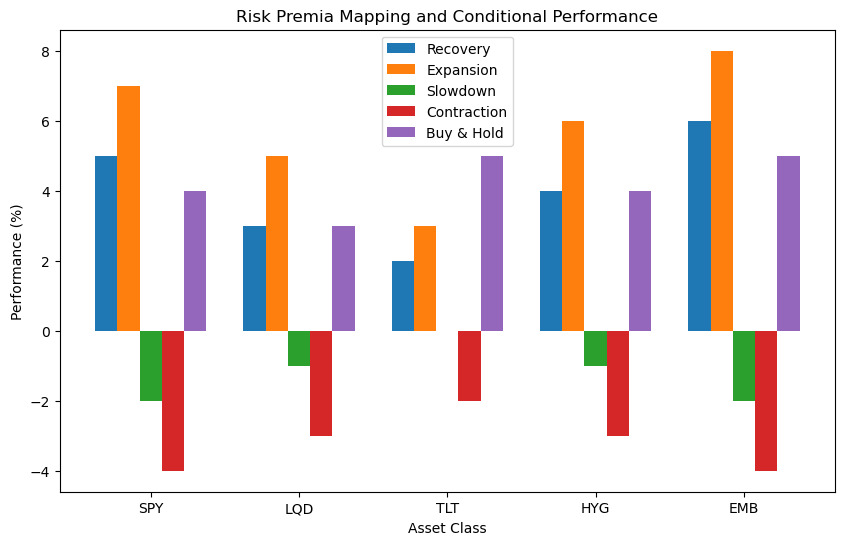

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# 자산 클래스와 국면별 수익률이 포함된 DataFrame을 가정합니다.
# 아래 데이터는 예시이며 실제 데이터로 대체해야 합니다.
data = {
    'Recovery': [5, 3, 2, 4, 6],  # 회복 국면에서의 수익률
    'Expansion': [7, 5, 3, 6, 8],  # 확장 국면에서의 수익률
    'Slowdown': [-2, -1, 0, -1, -2],  # 둔화 국면에서의 수익률
    'Contraction': [-4, -3, -2, -3, -4],  # 수축 국면에서의 수익률
    'Buy & Hold': [4, 3, 5, 4, 5]  # 매수 및 보유 국면에서의 수익률
}
asset_classes = ['SPY', 'LQD', 'TLT', 'HYG', 'EMB']
phases = list(data.keys())

# 데이터를 기반으로 그래프를 그립니다.
n = len(asset_classes)
r = np.arange(n)
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))

for i, phase in enumerate(phases):
    ax.bar(r + i*width, data[phase], width=width, label=phase)

# 축 이름과 제목을 추가합니다.
ax.set_xlabel('Asset Class')
ax.set_ylabel('Performance (%)')
ax.set_title('Risk Premia Mapping and Conditional Performance')
ax.set_xticks(r + width * (len(phases) - 1) / 2)
ax.set_xticklabels(asset_classes)
ax.legend()

# 그래프를 표시합니다.
plt.show()

In [130]:
co1 = model01.params
co2 = model02.params
co3 = model03.params
co4 = model04.params
co5 = model05.params
co6 = model06.params
co7 = model07.params
co8 = model08.params
co9 = model09.params
co10 = model10.params
co11 = model11.params
co12 = model12.params
co13 = model13.params
co14 = model14.params
co15 = model15.params
co16 = model16.params
co17 = model17.params
co18 = model18.params
co19 = model19.params
co20 = model20.params
co21 = model21.params
co22 = model22.params
co23 = model23.params
co24 = model24.params
co25 = model25.params

df1 = pd.DataFrame(co1, columns=['Coefficient'])
df2 = pd.DataFrame(co2, columns=['Coefficient'])
df3 = pd.DataFrame(co3, columns=['Coefficient'])
df4 = pd.DataFrame(co4, columns=['Coefficient'])
df5 = pd.DataFrame(co5, columns=['Coefficient'])
df6 = pd.DataFrame(co6, columns=['Coefficient'])
df7 = pd.DataFrame(co7, columns=['Coefficient'])
df8 = pd.DataFrame(co8, columns=['Coefficient'])
df9 = pd.DataFrame(co9, columns=['Coefficient'])
df10 = pd.DataFrame(co10, columns=['Coefficient'])
df11 = pd.DataFrame(co11, columns=['Coefficient'])
df12 = pd.DataFrame(co12, columns=['Coefficient'])
df13 = pd.DataFrame(co13, columns=['Coefficient'])
df14 = pd.DataFrame(co14, columns=['Coefficient'])
df15 = pd.DataFrame(co15, columns=['Coefficient'])
df16 = pd.DataFrame(co16, columns=['Coefficient'])
df17 = pd.DataFrame(co17, columns=['Coefficient'])
df18 = pd.DataFrame(co18, columns=['Coefficient'])
df19 = pd.DataFrame(co19, columns=['Coefficient'])
df20 = pd.DataFrame(co20, columns=['Coefficient'])
df21 = pd.DataFrame(co21, columns=['Coefficient'])
df22 = pd.DataFrame(co22, columns=['Coefficient'])
df23 = pd.DataFrame(co23, columns=['Coefficient'])
df24 = pd.DataFrame(co24, columns=['Coefficient'])
df25 = pd.DataFrame(co25, columns=['Coefficient'])

ols_result = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
                        df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
                        df21, df22, df23, df24, df25], axis=1)

ols_result.columns = [f'Coefficient_{i}' for i in range(1, 26)]

In [137]:
(co1)

const        0.019041
rf          -0.032359
credit01    -0.003155
credit02    -1.372835
credit03    -0.094384
term01      -0.501257
term02       0.214938
term03      98.870510
equity01    99.161023
equity02    -0.087192
dtype: float64

In [131]:
ols_result

,Coefficient_1,Coefficient_2,Coefficient_3,Coefficient_4,Coefficient_5,Coefficient_6,Coefficient_7,Coefficient_8,Coefficient_9,Coefficient_10,...,Coefficient_16,Coefficient_17,Coefficient_18,Coefficient_19,Coefficient_20,Coefficient_21,Coefficient_22,Coefficient_23,Coefficient_24,Coefficient_25
const,0.019041,1.441919,2.963295,1.136694,0.670633,0.019041,1.441919,2.963295,1.136694,0.670633,...,0.019041,1.441919,2.963295,1.136694,0.670633,0.019041,1.441919,2.963295,1.136694,0.670633
rf,-0.032359,-0.221776,0.175869,-0.184471,-0.415034,-0.032359,-0.221776,0.175869,-0.184471,-0.415034,...,-0.032359,-0.221776,0.175869,-0.184471,-0.415034,-0.032359,-0.221776,0.175869,-0.184471,-0.415034
credit01,-0.003155,0.170703,0.164852,0.173668,0.164709,-0.003155,0.170703,0.164852,0.173668,0.164709,...,-0.003155,0.170703,0.164852,0.173668,0.164709,-0.003155,0.170703,0.164852,0.173668,0.164709
credit02,-1.372835,-22.722316,-8.291953,-18.103659,-23.396772,-1.372835,-22.722316,-8.291953,-18.103659,-23.396772,...,-1.372835,-22.722316,-8.291953,-18.103659,-23.396772,-1.372835,-22.722316,-8.291953,-18.103659,-23.396772
credit03,-0.094384,9.292164,5.781072,8.669606,4.111960,-0.094384,9.292164,5.781072,8.669606,4.111960,...,-0.094384,9.292164,5.781072,8.669606,4.111960,-0.094384,9.292164,5.781072,8.669606,4.111960
term01,-0.501257,-10.402914,-14.901226,-5.127641,-8.908323,-0.501257,-10.402914,-14.901226,-5.127641,-8.908323,...,-0.501257,-10.402914,-14.901226,-5.127641,-8.908323,-0.501257,-10.402914,-14.901226,-5.127641,-8.908323
term02,0.214938,9.310062,16.629731,1.970221,7.039727,0.214938,9.310062,16.629731,1.970221,7.039727,...,0.214938,9.310062,16.629731,1.970221,7.039727,0.214938,9.310062,16.629731,1.970221,7.039727
term03,98.870510,7.068991,-36.057797,47.373474,32.029231,98.870510,7.068991,-36.057797,47.373474,32.029231,...,98.870510,7.068991,-36.057797,47.373474,32.029231,98.870510,7.068991,-36.057797,47.373474,32.029231
equity01,99.161023,9.272976,-30.219912,43.952978,33.839945,99.161023,9.272976,-30.219912,43.952978,33.839945,...,99.161023,9.272976,-30.219912,43.952978,33.839945,99.161023,9.272976,-30.219912,43.952978,33.839945
equity02,-0.087192,1.243177,1.467555,1.425744,0.710006,-0.087192,1.243177,1.467555,1.425744,0.710006,...,-0.087192,1.243177,1.467555,1.425744,0.710006,-0.087192,1.243177,1.467555,1.425744,0.710006


In [133]:
ols_result.to_csv('./ols_result.csv')

In [144]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 그림 사이즈, 바 굵기 조정
# fig, ax = plt.subplots(figsize=(12,6))
# bar_width = 0.25

# # 국면 5개
# index = np.arange(5)

# # 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
# # 각 국면별로 9개의 리스크 프리미엄의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격
# b1 = plt.bar(index, ols_result.loc['rf'], bar_width, alpha=0.4, color='red', label='shop A')
# b2 = plt.bar(index + bar_width, ols_result.loc['credit01'], bar_width, alpha=0.4, color='blue', label='shop B')
# b3 = plt.bar(index + 2 * bar_width, ols_result.loc['credit02'], bar_width, alpha=0.4, color='green', label='shop C')
# # b4 = plt.bar(index + 3 * bar_width, ols_result['Coefficient_4'], bar_width, alpha=0.4, color='green', label='shop C')
# # b5 = plt.bar(index + 4 * bar_width, ols_result['Coefficient_5'], bar_width, alpha=0.4, color='green', label='shop C')
# # b6 = plt.bar(index + 5 * bar_width, ols_result['Coefficient_6'], bar_width, alpha=0.4, color='green', label='shop C')

# # x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
# plt.xticks(np.arange(bar_width, 4 + bar_width, 1), year)

# # x축, y축 이름 및 범례 설정
# plt.xlabel('year', size = 13)
# plt.ylabel('revenue', size = 13)
# plt.legend()
# plt.show()